## Identitas

Objective:
- Memberikan informasi-informasi yang bermanfaat bagi pelamar pekerjaan sehingga memudahkan mereka dalam mencari pekerjaan

- Membangun model yang dapat memudahkan pencari kerja dalam mencari pekerjaan pada industri tertentu berdasarkan kualifikasi yang mereka punya

## Library

In [ ]:
# Mengimpor librarry
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from collections import Counter
from tabulate import tabulate

# Scaling
from sklearn.preprocessing import StandardScaler

# Encoding
from sklearn.preprocessing import OneHotEncoder

# Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Training
from sklearn.model_selection import train_test_split

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Model Evaluation
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings("ignore")

## Load Dataset

### Pekerjaan

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
lowongan_kerja = pd.read_csv ("/content/drive/MyDrive/Tim 5C Final Project Drive/Dataset/dataset-6/linkedIn_posting/lowongan_kerja.csv")

In [ ]:
benefit = pd.read_csv("/content/drive/MyDrive/Tim 5C Final Project Drive/Dataset/dataset-6/linkedIn_posting/detail_pekerjaan/benefit.csv")

In [ ]:
industri_pekerjaan = pd.read_csv("/content/drive/MyDrive/Tim 5C Final Project Drive/Dataset/dataset-6/linkedIn_posting/detail_pekerjaan/industri_pekerjaan.csv")

In [ ]:
skill_pekerjaan = pd.read_csv("/content/drive/MyDrive/Tim 5C Final Project Drive/Dataset/dataset-6/linkedIn_posting/detail_pekerjaan/skill_pekerjaan.csv")

### Mapping

In [ ]:
industri = pd.read_csv("/content/drive/MyDrive/Tim 5C Final Project Drive/Dataset/dataset-6/linkedIn_posting/mapping/industri.csv")

In [ ]:
kemampuan = pd.read_csv("/content/drive/MyDrive/Tim 5C Final Project Drive/Dataset/dataset-6/linkedIn_posting/mapping/kemampuan.csv")

In [ ]:
kemampuan.shape

(35, 2)

### Menggabungkan

In [ ]:
merged_df1 = pd.merge(lowongan_kerja, industri_pekerjaan, how="left", on="id_pekerjaan")

In [ ]:
merged_df2 = pd.merge(merged_df1, industri, how="left", on="id_industri")

In [ ]:
merged_df3 = pd.merge(merged_df2, skill_pekerjaan, how="left", on="id_pekerjaan")

In [ ]:
merged_df4 = pd.merge(merged_df3, kemampuan, how="left", on="singkatan_kemampuan")

In [ ]:
merged_df5 = pd.merge(merged_df4, benefit, how="left", on="id_pekerjaan")

In [ ]:
merged_df5

,id_pekerjaan,id_perusahaan,judul,deskripsi,gaji_maksimal,gaji_tengah,gaji_minimal,periode_pembayaran,jenis_pekerjaan_terformat,lokasi,...,mata_uang,tipe_kompensasi,waktu_kedaluwarsa,waktu_daftar,id_industri,nama_industri,singkatan_kemampuan,nama_kemampuan,benefit,jenis
0,3757940104,553718.0,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,NaN,5250.0,NaN,MONTHLY,Full-time,"Little River, SC",...,USD,BASE_SALARY,2023-12-04 08:53:20,2023-11-04 09:26:40,17.0,Medical Equipment Manufacturing,OTHR,Other,1.0,Medical insurance
1,3757940104,553718.0,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,NaN,5250.0,NaN,MONTHLY,Full-time,"Little River, SC",...,USD,BASE_SALARY,2023-12-04 08:53:20,2023-11-04 09:26:40,17.0,Medical Equipment Manufacturing,OTHR,Other,1.0,Disability insurance
2,3757940025,2192142.0,Shipping & Receiving Associate 2nd shift (Beav...,Metalcraft of Mayville\nMetalcraft of Mayville...,NaN,NaN,NaN,NaN,Full-time,"Beaver Dam, WI",...,NaN,NaN,2023-12-04 08:53:20,2023-11-04 06:40:00,135.0,Industrial Machinery Manufacturing,MGMT,Management,NaN,NaN
3,3757940025,2192142.0,Shipping & Receiving Associate 2nd shift (Beav...,Metalcraft of Mayville\nMetalcraft of Mayville...,NaN,NaN,NaN,NaN,Full-time,"Beaver Dam, WI",...,NaN,NaN,2023-12-04 08:53:20,2023-11-04 06:40:00,135.0,Industrial Machinery Manufacturing,MNFC,Manufacturing,NaN,NaN
4,3757938019,474443.0,"Manager, Engineering",\nThe TSUBAKI name is synonymous with excellen...,NaN,NaN,NaN,NaN,Full-time,"Bessemer, AL",...,NaN,NaN,2023-12-04 08:53:20,2023-11-04 06:40:00,147.0,Automation Machinery Manufacturing,ENG,Engineering,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127209,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,52000.0,NaN,45760.0,YEARLY,Full-time,"Chico, CA",...,USD,BASE_SALARY,2024-02-18 23:46:40,2023-08-23 00:20:00,42.0,Insurance,BD,Business Development,0.0,Paid maternity leave
127210,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,52000.0,NaN,45760.0,YEARLY,Full-time,"Chico, CA",...,USD,BASE_SALARY,2024-02-18 23:46:40,2023-08-23 00:20:00,42.0,Insurance,BD,Business Development,0.0,Paid paternity leave
127211,3958427,630152.0,Stylist/ Clorist,Karen Marie is looking for an awesome experien...,80000.0,NaN,35000.0,YEARLY,Full-time,"Chicago, IL",...,USD,BASE_SALARY,2024-05-01 21:46:40,2023-11-03 22:20:00,18.0,Personal Care Product Manufacturing,DSGN,Design,0.0,Medical insurance
127212,3958427,630152.0,Stylist/ Clorist,Karen Marie is looking for an awesome experien...,80000.0,NaN,35000.0,YEARLY,Full-time,"Chicago, IL",...,USD,BASE_SALARY,2024-05-01 21:46:40,2023-11-03 22:20:00,18.0,Personal Care Product Manufacturing,ART,Art/Creative,0.0,Medical insurance


## Data Preprocessing

### Feature Selection

In [ ]:
df = merged_df5.drop(["deskripsi", "lokasi", "mata_uang", "tipe_kompensasi", "waktu_kedaluwarsa",
                "waktu_daftar", "lamaran", "diperbolehkan_jarak_jauh", "deskripsi_keterampilan",
                "domain_penyelenggaraan", "disponsori", "jenis_pekerjaan", "tampilan", "url_posting_pekerjaan", "url_pendaftaran", "tipe_pendaftaran", "id_perusahaan", "judul",
                "id_industri", "singkatan_kemampuan", "benefit", "jenis_pekerjaan_terformat"], axis=1)

In [ ]:
df

,id_pekerjaan,gaji_maksimal,gaji_tengah,gaji_minimal,periode_pembayaran,tingkat_pengalaman_terformat,nama_industri,nama_kemampuan,jenis
0,3757940104,NaN,5250.0,NaN,MONTHLY,Entry level,Medical Equipment Manufacturing,Other,Medical insurance
1,3757940104,NaN,5250.0,NaN,MONTHLY,Entry level,Medical Equipment Manufacturing,Other,Disability insurance
2,3757940025,NaN,NaN,NaN,NaN,NaN,Industrial Machinery Manufacturing,Management,NaN
3,3757940025,NaN,NaN,NaN,NaN,NaN,Industrial Machinery Manufacturing,Manufacturing,NaN
4,3757938019,NaN,NaN,NaN,NaN,NaN,Automation Machinery Manufacturing,Engineering,NaN
...,...,...,...,...,...,...,...,...,...
127209,85008768,52000.0,NaN,45760.0,YEARLY,NaN,Insurance,Business Development,Paid maternity leave
127210,85008768,52000.0,NaN,45760.0,YEARLY,NaN,Insurance,Business Development,Paid paternity leave
127211,3958427,80000.0,NaN,35000.0,YEARLY,NaN,Personal Care Product Manufacturing,Design,Medical insurance
127212,3958427,80000.0,NaN,35000.0,YEARLY,NaN,Personal Care Product Manufacturing,Art/Creative,Medical insurance


### Standarisasi Gaji

#### Mencari nilai tengah dari kisaran gaji yang ditawarkan

In [ ]:
df["gaji_median"] = df[["gaji_minimal", "gaji_maksimal"]].mean(axis=1)
df

,id_pekerjaan,gaji_maksimal,gaji_tengah,gaji_minimal,periode_pembayaran,tingkat_pengalaman_terformat,nama_industri,nama_kemampuan,jenis,gaji_median
0,3757940104,NaN,5250.0,NaN,MONTHLY,Entry level,Medical Equipment Manufacturing,Other,Medical insurance,NaN
1,3757940104,NaN,5250.0,NaN,MONTHLY,Entry level,Medical Equipment Manufacturing,Other,Disability insurance,NaN
2,3757940025,NaN,NaN,NaN,NaN,NaN,Industrial Machinery Manufacturing,Management,NaN,NaN
3,3757940025,NaN,NaN,NaN,NaN,NaN,Industrial Machinery Manufacturing,Manufacturing,NaN,NaN
4,3757938019,NaN,NaN,NaN,NaN,NaN,Automation Machinery Manufacturing,Engineering,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
127209,85008768,52000.0,NaN,45760.0,YEARLY,NaN,Insurance,Business Development,Paid maternity leave,48880.0
127210,85008768,52000.0,NaN,45760.0,YEARLY,NaN,Insurance,Business Development,Paid paternity leave,48880.0
127211,3958427,80000.0,NaN,35000.0,YEARLY,NaN,Personal Care Product Manufacturing,Design,Medical insurance,57500.0
127212,3958427,80000.0,NaN,35000.0,YEARLY,NaN,Personal Care Product Manufacturing,Art/Creative,Medical insurance,57500.0


Dari kisaran gaji yang ditawarkan, yaitu berdasarkan kolom gaji_minimal dan gaji_maksimal, dicari nilai tengah dari kisaran gaji tersebut.

#### Menggabungkan kolom gaji

In [ ]:
df["gaji"] = df["gaji_tengah"].combine_first(df["gaji_median"])
df

,id_pekerjaan,gaji_maksimal,gaji_tengah,gaji_minimal,periode_pembayaran,tingkat_pengalaman_terformat,nama_industri,nama_kemampuan,jenis,gaji_median,gaji
0,3757940104,NaN,5250.0,NaN,MONTHLY,Entry level,Medical Equipment Manufacturing,Other,Medical insurance,NaN,5250.0
1,3757940104,NaN,5250.0,NaN,MONTHLY,Entry level,Medical Equipment Manufacturing,Other,Disability insurance,NaN,5250.0
2,3757940025,NaN,NaN,NaN,NaN,NaN,Industrial Machinery Manufacturing,Management,NaN,NaN,NaN
3,3757940025,NaN,NaN,NaN,NaN,NaN,Industrial Machinery Manufacturing,Manufacturing,NaN,NaN,NaN
4,3757938019,NaN,NaN,NaN,NaN,NaN,Automation Machinery Manufacturing,Engineering,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
127209,85008768,52000.0,NaN,45760.0,YEARLY,NaN,Insurance,Business Development,Paid maternity leave,48880.0,48880.0
127210,85008768,52000.0,NaN,45760.0,YEARLY,NaN,Insurance,Business Development,Paid paternity leave,48880.0,48880.0
127211,3958427,80000.0,NaN,35000.0,YEARLY,NaN,Personal Care Product Manufacturing,Design,Medical insurance,57500.0,57500.0
127212,3958427,80000.0,NaN,35000.0,YEARLY,NaN,Personal Care Product Manufacturing,Art/Creative,Medical insurance,57500.0,57500.0


#### Menghilangkan kolom yang tidak diperlukan

In [ ]:
df.drop(columns=["gaji_maksimal", "gaji_tengah", "gaji_minimal", "gaji_median"], inplace=True)

#### Standarisasi gaji menjadi tahunan

In [ ]:
def hitung_gaji_tahunan(row):
    if row["periode_pembayaran"] == "YEARLY":
        return row["gaji"]
    elif row["periode_pembayaran"] == "MONTHLY":
        return row["gaji"] * 12
    elif row["periode_pembayaran"] == "WEEKLY":
        return row["gaji"] * 52
    elif row["periode_pembayaran"] == "HOURLY":
        return row["gaji"] * 2080

Dengan menggunakan formula di atas, dilakukan standarisasi gaji menjadi tahunan.

In [ ]:
df["gaji_tahunan"] = df.apply(hitung_gaji_tahunan, axis = 1)
df

,id_pekerjaan,periode_pembayaran,tingkat_pengalaman_terformat,nama_industri,nama_kemampuan,jenis,gaji,gaji_tahunan
0,3757940104,MONTHLY,Entry level,Medical Equipment Manufacturing,Other,Medical insurance,5250.0,63000.0
1,3757940104,MONTHLY,Entry level,Medical Equipment Manufacturing,Other,Disability insurance,5250.0,63000.0
2,3757940025,NaN,NaN,Industrial Machinery Manufacturing,Management,NaN,NaN,NaN
3,3757940025,NaN,NaN,Industrial Machinery Manufacturing,Manufacturing,NaN,NaN,NaN
4,3757938019,NaN,NaN,Automation Machinery Manufacturing,Engineering,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
127209,85008768,YEARLY,NaN,Insurance,Business Development,Paid maternity leave,48880.0,48880.0
127210,85008768,YEARLY,NaN,Insurance,Business Development,Paid paternity leave,48880.0,48880.0
127211,3958427,YEARLY,NaN,Personal Care Product Manufacturing,Design,Medical insurance,57500.0,57500.0
127212,3958427,YEARLY,NaN,Personal Care Product Manufacturing,Art/Creative,Medical insurance,57500.0,57500.0


Dibuatlah kolom baru untuk menyimpan data gaji yang telah terstandarisasi menjadi tahunan.

#### Menghilangkan kolom yang tidak diperlukan

In [ ]:
df.drop(columns=["periode_pembayaran", "gaji"], inplace=True)

In [ ]:
df

,id_pekerjaan,tingkat_pengalaman_terformat,nama_industri,nama_kemampuan,jenis,gaji_tahunan
0,3757940104,Entry level,Medical Equipment Manufacturing,Other,Medical insurance,63000.0
1,3757940104,Entry level,Medical Equipment Manufacturing,Other,Disability insurance,63000.0
2,3757940025,NaN,Industrial Machinery Manufacturing,Management,NaN,NaN
3,3757940025,NaN,Industrial Machinery Manufacturing,Manufacturing,NaN,NaN
4,3757938019,NaN,Automation Machinery Manufacturing,Engineering,NaN,NaN
...,...,...,...,...,...,...
127209,85008768,NaN,Insurance,Business Development,Paid maternity leave,48880.0
127210,85008768,NaN,Insurance,Business Development,Paid paternity leave,48880.0
127211,3958427,NaN,Personal Care Product Manufacturing,Design,Medical insurance,57500.0
127212,3958427,NaN,Personal Care Product Manufacturing,Art/Creative,Medical insurance,57500.0


### Mengganti nama kolom

In [ ]:
df.rename(columns={"tingkat_pengalaman_terformat": "tingkat_pengalaman",
"nama_industri": "industri",
"nama_kemampuan": "kemampuan",
"jenis": "benefit"}, inplace=True)

Ada empat kolom yang akan dirubah namanya agar lebih memudahkan pembaca dalam memahami informasi-informasi yang akan didapat.

### Duplicates Value

In [ ]:
df.duplicated().sum()

0

Diketahui bahwa dataset tidak terindikasi mempunyai duplicate value.

### Missing values

#### Memeriksa Missing Value

In [ ]:
df.isnull().sum()

id_pekerjaan              0
tingkat_pengalaman    33940
industri               1384
kemampuan              1979
benefit               51178
gaji_tahunan          66159
dtype: int64

Ternyata ada lima kolom yang terindikasi missing values.

#### Imputasi

In [ ]:
df["tingkat_pengalaman"].fillna("Tidak ada persyaratan", inplace=True)

In [ ]:
df["industri"].fillna("Tidak diketahui", inplace=True)

In [ ]:
df["kemampuan"].fillna("Tidak ada persyaratan", inplace=True)

In [ ]:
df["benefit"].fillna("Tidak ada benefit yang diberikan", inplace=True)

In [ ]:
def mode(series):
    return series.mode().iloc[0] if not series.mode().empty else 0

# Group by the 'Group' column and fill missing values with the mode
df["gaji_tahunan"] = df.groupby('industri')['gaji_tahunan'].transform(lambda x: x.fillna(mode(x)))
df

,id_pekerjaan,tingkat_pengalaman,industri,kemampuan,benefit,gaji_tahunan
0,3757940104,Entry level,Medical Equipment Manufacturing,Other,Medical insurance,63000.0
1,3757940104,Entry level,Medical Equipment Manufacturing,Other,Disability insurance,63000.0
2,3757940025,Tidak ada persyaratan,Industrial Machinery Manufacturing,Management,Tidak ada benefit yang diberikan,75000.0
3,3757940025,Tidak ada persyaratan,Industrial Machinery Manufacturing,Manufacturing,Tidak ada benefit yang diberikan,75000.0
4,3757938019,Tidak ada persyaratan,Automation Machinery Manufacturing,Engineering,Tidak ada benefit yang diberikan,212500.0
...,...,...,...,...,...,...
127209,85008768,Tidak ada persyaratan,Insurance,Business Development,Paid maternity leave,48880.0
127210,85008768,Tidak ada persyaratan,Insurance,Business Development,Paid paternity leave,48880.0
127211,3958427,Tidak ada persyaratan,Personal Care Product Manufacturing,Design,Medical insurance,57500.0
127212,3958427,Tidak ada persyaratan,Personal Care Product Manufacturing,Art/Creative,Medical insurance,57500.0


Untuk mengatasi missing values, dilakukan imputing.

- kolom tingkat_pengalaman dan kolom kemampuan merupakan kolom yang memberikan informasi mengenai persyaratan dari pekerjaan. Sehingga pada missing value dari kedua kolom tersebut, kami handle dengan mengisinya dengan keterangan "tidak ada persyaratan"
- kolom industri merupakan kolom yang memberikan informasi mengenai identitas dari industri. Sehingga pada missing value pada kolom tersebut, kami handle dengan mengisinya dengan keterangan "Tidak diketahui".
- kolom benefit merupakan kolom yang memberikan informasi mengenai benefit yang diberikan oleh pekerjaan. Sehingga pada missing value dari kolom tersebut, kami handle dengan mengisinya dengan keterangan "Tidak ada benefit yang diberikan".
- Kolom gaji_tahunan merupakan kolom yang memberikan informasi mengenai gaji tahunan yang diberikan oleh perusahaan. Dikarenakan kami mengeksplorasi dataset ini berdasarkan industri, maka kami handle missing valuenya berdasarkan modus atau nilai terbanyak dari gaji tahunan per industri.

#### Memeriksa kembali missing values setelah melakukan imputasi

In [ ]:
df.isnull().sum()

id_pekerjaan          0
tingkat_pengalaman    0
industri              0
kemampuan             0
benefit               0
gaji_tahunan          0
dtype: int64

Setelah dilakukan imputing, dataset sudah tidak lagi terindikasi missing values.

### Imbalance Dataset

In [ ]:
df["industri"].value_counts()

industri
IT Services and IT Consulting          8991
Hospitals and Health Care              7160
Financial Services                     6088
Staffing and Recruiting                5627
Software Development                   4903
                                       ... 
Online Media                              1
Health, Wellness & Fitness                1
Administrative and Support Services       1
Telephone Call Centers                    1
Economic Programs                         1
Name: count, Length: 213, dtype: int64

Dataset terindikasi terdapat imbalance pada kelas

## Exploratory Data Analysis (EDA)

### Informasi dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127214 entries, 0 to 127213
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id_pekerjaan        127214 non-null  int64  
 1   tingkat_pengalaman  127214 non-null  object 
 2   industri            127214 non-null  object 
 3   kemampuan           127214 non-null  object 
 4   benefit             127214 non-null  object 
 5   gaji_tahunan        127214 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 5.8+ MB


Dataset yang digunakan mempunyai 127214 baris dan 6 kolom.

### Mendeskripsikan variabel kategorikal

In [ ]:
df.describe(include=object)

,tingkat_pengalaman,industri,kemampuan,benefit
count,127214,127214,127214,127214
unique,7,213,36,13
top,Mid-Senior level,IT Services and IT Consulting,Information Technology,Tidak ada benefit yang diberikan
freq,43469,8991,14378,51178


1. tingkat_pengalaman merupakan variabel yang mewakili tingkat pengalaman kualifikasi pekerjaan

    Dari data yang telah diolah diketahui bahwa tingkat pengalaman yang dibutuhkan ada enam jenis. Tingkat pengalaman Mid-Senior merupakan tingkat pengalaman yang paling banyak dibutuhkan yaitu sebanyak 43469 pekerjaan membutuhkan orang dengan kualifikasi tingkat pengalaman ini.

2. industri merupakan variabel yang mewakili nama industri pada pekerjaan

    Dari data yang telah diolah diketahui bahwa ada sebanyak 212 industri yang terdapat pada lowongan pekerjaan. Industri IT Services and IT Consulting merupakan industri terbanyak yang membuka lowongan pekerjaan.

3. kemampuan merupakan variabel yang mewakili kualifikasi kemampuan pekerjaan

    Dari data yang telah diolah diketahui bahwa dari total 127214 lowongan pekerjaan ada sebanyak 35 kemampuan yang dibutuhkan. IT adalah kemampuan yang paling banyak dibutuhkan.

4. benefit merupakan variabel yang mewakili benefit yang akan diterima oleh orang yang bekerja pada pekerjaan itu

    Dari data yang telah diolah diketahui bahwa ada sebanyak 12 jenis benefit yang ditawarkan. Meskipun ada banyak jenis benefit yang ditawarkan namun ternyata sebagian besar lowongan pekerjan tidak menawarkan benefit.

# Pre Modelling

## Splitting Dataset

In [ ]:
# customize the code below to encode X features column using one hot encoder inside pipeline column transformers
X = df[["tingkat_pengalaman", "kemampuan" , "benefit" , "gaji_tahunan"]]
y = df["industri"]

## Feature Encoding

In [ ]:
encoder = OneHotEncoder(handle_unknown="ignore", sparse=False)
encoder.fit(X)
# Apply the encoder.
X = encoder.transform(X)

In [ ]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelling

## KNN (K-nearest neighbors)

In [ ]:
# Mempersiapkan model
KNN = KNeighborsClassifier(n_neighbors=9, weights="distance", metric="manhattan")
KNN.fit(X_train, y_train)
y_pred_KNN = KNN.predict(X_test)

# Melakukan metric evaluation pada model
accuracy_KNN = accuracy_score(y_test, y_pred_KNN)
precision_KNN, recall_KNN, fscore_KNN, _ = precision_recall_fscore_support(y_test, y_pred_KNN, average="weighted")

# Menampilkan hasil metric evaluation
KNN_models = pd.DataFrame({
    "Metric Evaluation": ["Accuracy", "Precision", "Recall", "F1-Score"],
    "Score": [accuracy_KNN, precision_KNN, recall_KNN, fscore_KNN]})
KNN_models

,Metric Evaluation,Score
0,Accuracy,0.463035
1,Precision,0.469589
2,Recall,0.463035
3,F1-Score,0.456983


## Decision Tree

In [ ]:
# Mempersiapkan model
DT = DecisionTreeClassifier(random_state=42)
DT.fit(X_train, y_train)
y_pred_DT = DT.predict(X_test)

# Melakukan metric evaluation pada model
accuracy_DT = accuracy_score(y_test, y_pred_DT)
precision_DT, recall_DT, fscore_DT, _ = precision_recall_fscore_support(y_test, y_pred_DT, average="weighted")

# Menampilkan hasil metric evaluation
DT_models = pd.DataFrame({
    "Metric Evaluation": ["Accuracy", "Precision", "Recall", "F1-Score"],
    "Score": [accuracy_DT, precision_DT, recall_DT, fscore_DT]})
DT_models

,Metric Evaluation,Score
0,Accuracy,0.533978
1,Precision,0.535638
2,Recall,0.533978
3,F1-Score,0.528380


## Naive Bayes

In [ ]:
# Mempersiapkan model
NB = GaussianNB()
NB.fit(X_train, y_train)
y_pred_NB = NB.predict(X_test)

# Melakukan metric evaluation pada model
accuracy_NB = accuracy_score(y_test, y_pred_NB)
precision_NB, recall_NB, fscore_NB, _ = precision_recall_fscore_support(y_test, y_pred_NB, average="weighted")

# Menampilkan hasil metric evaluation
NB_models = pd.DataFrame({
    "Metric Evaluation": ["Accuracy", "Precision", "Recall", "F1-Score"],
    "Score": [accuracy_NB, precision_NB, recall_NB, fscore_NB]})
NB_models

,Metric Evaluation,Score
0,Accuracy,0.150729
1,Precision,0.575186
2,Recall,0.150729
3,F1-Score,0.157529


## Logistic Regression

In [ ]:
# Mempersiapkan model
LR = LogisticRegression()
LR.fit(X_train, y_train)
y_pred_LR = LR.predict(X_test)

# Melakukan metric evaluation pada model
accuracy_LR = accuracy_score(y_test, y_pred_LR)
precision_LR, recall_LR, fscore_LR, _ = precision_recall_fscore_support(y_test, y_pred_LR, average="weighted")

# Menampilkan hasil metric evaluation
LR_models = pd.DataFrame({
    "Metric Evaluation": ["Accuracy", "Precision", "Recall", "F1-Score"],
    "Score": [accuracy_LR, precision_LR, recall_LR, fscore_LR]})
LR_models

,Metric Evaluation,Score
0,Accuracy,0.559604
1,Precision,0.553238
2,Recall,0.559604
3,F1-Score,0.543796


# Komparasi Metric Evaluation

## Tabel

In [ ]:
Best_models = pd.DataFrame({
    "Model": ["KNN", "Decision Tree", "Naive Bayes", "Logistic Regression"],
    "F1-Score": [fscore_KNN, fscore_DT, fscore_NB, fscore_LR]})
Best_models.sort_values(by="F1-Score", ascending=False)

,Model,F1-Score
3,Logistic Regression,0.543796
1,Decision Tree,0.528380
0,KNN,0.456983
2,Naive Bayes,0.157529


## Grafik

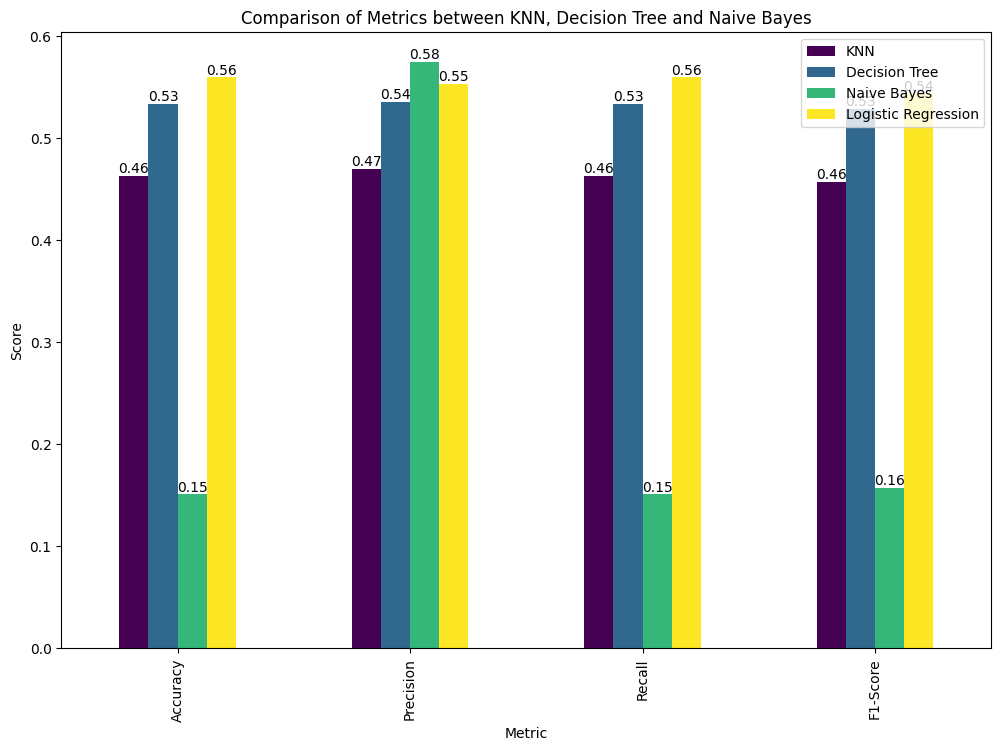

In [ ]:
# Membandingkan
metrics_df = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score"],
    "KNN": [accuracy_KNN, precision_KNN, recall_KNN, fscore_KNN],
    "Decision Tree": [accuracy_DT, precision_DT, recall_DT, fscore_DT],
    "Naive Bayes": [accuracy_NB, precision_NB, recall_NB, fscore_NB],
    "Logistic Regression": [accuracy_LR, precision_LR, recall_LR, fscore_LR],
})

# Plotting
ax = metrics_df.plot(x="Metric", kind="bar", figsize=(12, 8), colormap="viridis")
plt.title("Comparison of Metrics between KNN, Decision Tree and Naive Bayes")
plt.ylabel("Score")

# Annotate bars with values
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f")
plt.show()

Dari hasil komparasi keempat model yang telah dijalankan, diketahui bahwa algoritma logistic regression merupakan model yang memiliki performa terbaik di antara ketiga model lainnnya. Oleh karena itu, digunakanlah model logistic regression pada dataset ini.